In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('00_Data/relevant_data_v1.csv')
data.head()

,SCRAM,EST_ST,EST_MSA,TBIRTH_YEAR,ARACE,EGENID_BIRTH,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,...,FRMLA_AGE,BABY_FED,MHLTH_NEED,MHLTH_GET,MHLTH_SATISFD,MHLTH_DIFFCLT,SOCIAL1,SOCIAL2,CURFOODSUF,EEDUC
0,P090000004,48,19100.0,1970,2,2,1,2,0,1,...,-88,-88,-88,-88,-88,-88,2,4,2,6
1,P090000005,12,NaN,1958,2,1,1,2,0,1,...,-88,-88,-88,-88,-88,-88,5,5,1,3
2,P090000009,17,16980.0,1955,2,2,2,2,0,2,...,-88,-88,-88,-88,-88,-88,2,4,1,5
3,P090000011,4,38060.0,1961,2,2,3,2,0,3,...,-88,-88,-88,-88,-88,-88,2,4,2,6
4,P090000014,22,NaN,1992,2,2,4,2,2,2,...,-88,-88,2,1,1,3,3,3,3,5


In [3]:
df_cleaned = data[['SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND','ANXIOUS','WORRY','INTEREST','DOWN']]
df_cleaned.head()

,SEEING,HEARING,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,ANXIOUS,WORRY,INTEREST,DOWN
0,1,1,1,1,1,1,1,1,1,1
1,3,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,2,1,1,1,1,1,1,1,1,1
4,3,2,3,2,1,1,4,3,3,3


Number of -88 & -99 answers: 
SEEING         525
HEARING        739
REMEMBERING    622
MOBILITY       616
SELFCARE       623
UNDERSTAND     595
ANXIOUS        699
WORRY          755
INTEREST       765
DOWN           764
dtype: int64

Number of samples after data cleaning:  48541


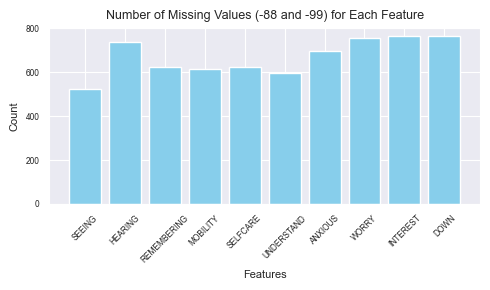

In [4]:
categorical_columns = ['SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND','ANXIOUS','WORRY','INTEREST','DOWN']

# Count -88 and -99 values for each feature
missing_counts = df_cleaned[categorical_columns].isin([-88, -99]).sum()
print("Number of -88 & -99 answers: ")
print(missing_counts)
print("")
# Calculate the number of samples left after excluding -88 and -99
samples_left = len(df_cleaned) - df_cleaned[categorical_columns].isin([-88, -99]).any(axis=1).sum()
print("Number of samples after data cleaning: ",samples_left)

# Plot the number of -88 and -99 values for each feature
# Convert missing counts to a Pandas Series if it's not already
missing_counts_series = pd.Series(missing_counts, index=categorical_columns)

# Convert to a dictionary for manual plotting
missing_counts_dict = missing_counts.to_dict()

# Plot using matplotlib
plt.figure(figsize=(5, 3))
plt.bar(missing_counts_dict.keys(), missing_counts_dict.values(), color='skyblue')
plt.title('Number of Missing Values (-88 and -99) for Each Feature', fontsize=9)
plt.xlabel('Features', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.yticks(fontsize=6)
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [5]:
# Exclude rows with -88 and -99 in any categorical column
filtered_data = df_cleaned[~df_cleaned[categorical_columns].isin([-88, -99]).any(axis=1)]
# Descriptive analysis on filtered data
# Summary statistics
def calculate_summary_stats(data, columns):
    summary = {}
    for col in columns:
        counts = data[col].value_counts().sort_index()
        proportions = counts / len(data)
        summary[col] = pd.DataFrame({'Count': counts, 'Proportion': proportions})
    return summary

summary_stats_filtered = calculate_summary_stats(filtered_data, categorical_columns)
summary_stats_filtered

{'SEEING':         Count  Proportion
 SEEING                   
 1       33413    0.688346
 2       13640    0.281000
 3        1401    0.028862
 4          87    0.001792,
 'HEARING':          Count  Proportion
 HEARING                   
 1        40297    0.830164
 2         7260    0.149564
 3          889    0.018314
 4           95    0.001957,
 'REMEMBERING':              Count  Proportion
 REMEMBERING                   
 1            32751    0.674708
 2            13772    0.283719
 3             1939    0.039946
 4               79    0.001627,
 'MOBILITY':           Count  Proportion
 MOBILITY                   
 1         36203    0.745823
 2          9602    0.197812
 3          2470    0.050885
 4           266    0.005480,
 'SELFCARE':           Count  Proportion
 SELFCARE                   
 1         44741    0.921716
 2          3171    0.065326
 3           551    0.011351
 4            78    0.001607,
 'UNDERSTAND':             Count  Proportion
 UNDERSTAND         

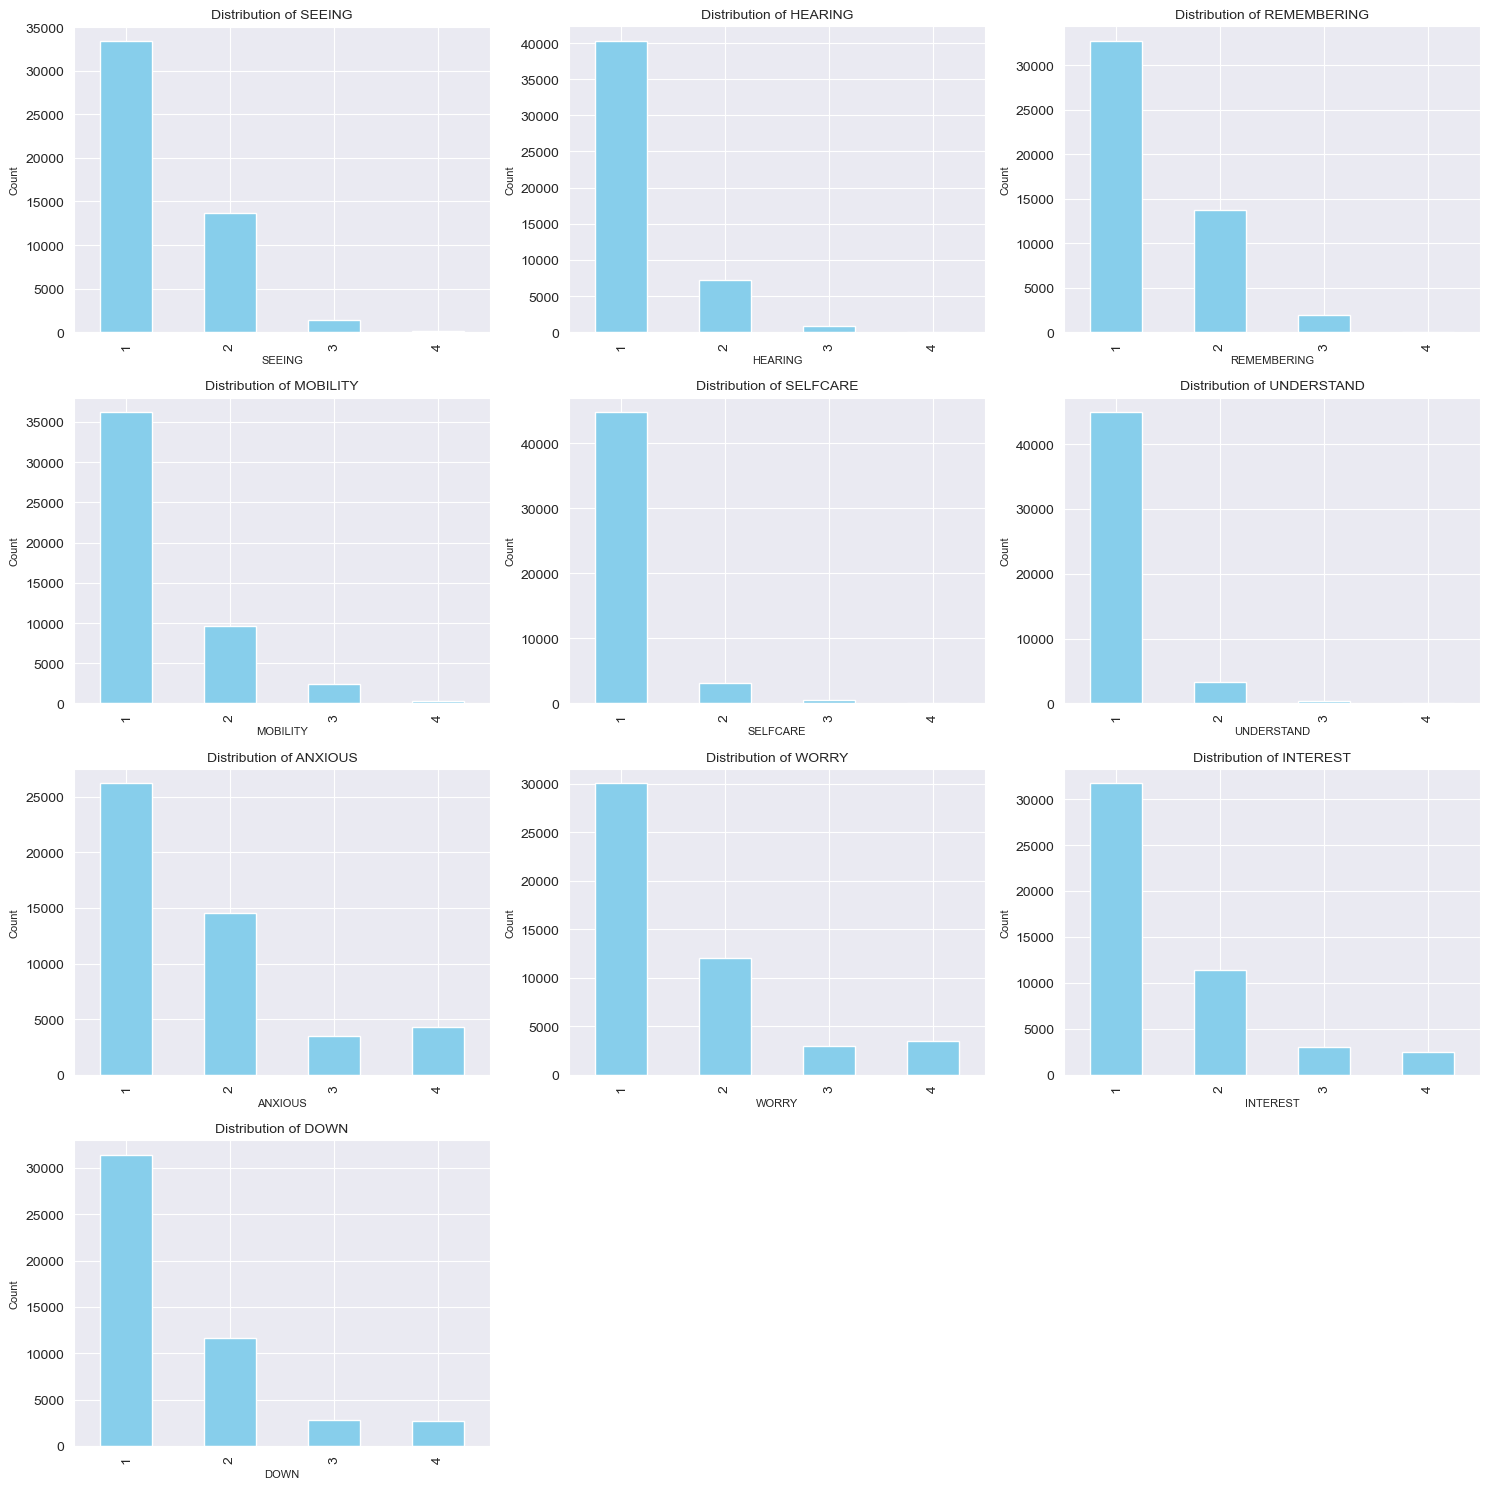

In [7]:
### 1. Bar Plots Grid ###
fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Create a 3x3 grid for bar plots
axes = axes.flatten()  # Flatten for easy indexing

for i, col in enumerate(categorical_columns):
    if i < len(axes):  # Ensure we don't exceed the grid size
        filtered_data[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}', fontsize=10)
        axes[i].set_xlabel(col, fontsize=8)
        axes[i].set_ylabel('Count', fontsize=8)

# Hide unused subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

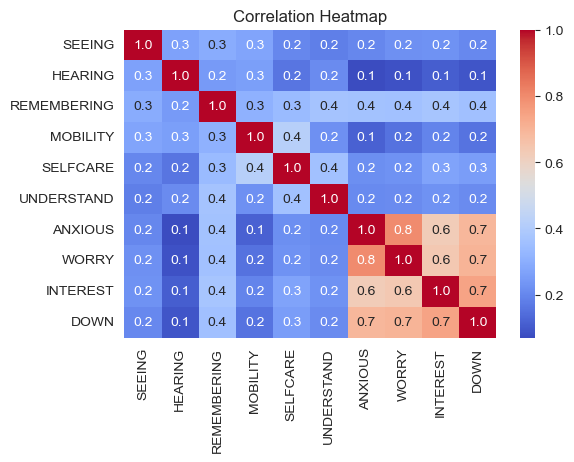

In [8]:
### 3. Correlation Heatmap ###
correlation_matrix_filtered = filtered_data.corr()
plt.figure(figsize=(6, 4))  # Standalone plot for the heatmap
sns.heatmap(correlation_matrix_filtered, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

In [12]:
from scipy.stats import norm
import pandas as pd
import itertools

# Collect results in a DataFrame
results = []

# Loop through all combinations of disability and mental health features
disability_features = ['SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND']
mental_health_features = ['ANXIOUS', 'WORRY', 'INTEREST', 'DOWN']

for d_feature, mh_feature in itertools.product(disability_features, mental_health_features):
    # Group with no disability (response = 1)
    group_no_disability = data[data[d_feature] == 1][mh_feature]

    # Group with disability (response > 1)
    Effe = data[data[d_feature] > 1][mh_feature]

    # Compute the mean difference, pooled standard deviation, z-statistic, and p-value
    mean_diff = group_disability.mean() - group_no_disability.mean()
    pooled_std = ((group_disability.std()**2 + group_no_disability.std()**2) / 2)**0.5
    z_stat = mean_diff / (pooled_std / ((len(group_disability) + len(group_no_disability))**0.5))
    p_value = round(2 * norm.sf(abs(z_stat)), 3)

    results.append({
        'Disability Feature': d_feature,
        'Mental Health Feature': mh_feature,
        'Mean Difference': mean_diff,
        'Z-Statistic': z_stat,
        'P-Value': p_value
    })

# Convert results to a DataFrame
z_test_results = pd.DataFrame(results)

# Display the results
z_test_results


,Disability Feature,Mental Health Feature,Mean Difference,Z-Statistic,P-Value
0,SEEING,ANXIOUS,0.016771,0.507575,0.612
1,SEEING,WORRY,0.147968,4.158003,0.000
2,SEEING,INTEREST,0.327412,9.321908,0.000
3,SEEING,DOWN,0.196247,5.526620,0.000
4,HEARING,ANXIOUS,0.055844,1.753557,0.080
5,HEARING,WORRY,0.191225,5.954836,0.000
6,HEARING,INTEREST,0.151175,4.491592,0.000
7,HEARING,DOWN,0.014587,0.424432,0.671
8,REMEMBERING,ANXIOUS,0.655597,22.472912,0.000
9,REMEMBERING,WORRY,0.698137,23.134188,0.000


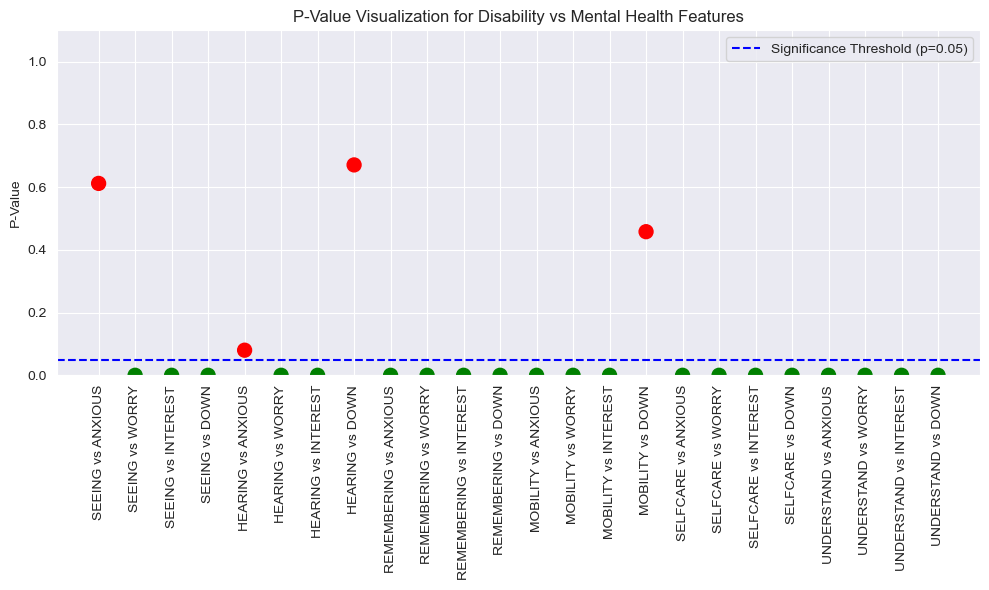

In [13]:
# Prepare data for scatterplot
x = z_test_results['Disability Feature'] + " vs " + z_test_results['Mental Health Feature']
y = z_test_results['P-Value']
colors = ['red' if p > 0.05 else 'green' for p in y]

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x)), y, c=colors, s=100)  # s=100 ensures all points have the same size
plt.axhline(y=0.05, color='blue', linestyle='--', label='Significance Threshold (p=0.05)')
plt.xticks(range(len(x)), x, rotation=90)
plt.ylim(0, 1.1)
plt.ylabel('P-Value')
plt.title('P-Value Visualization for Disability vs Mental Health Features')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
import statsmodels.api as sm

# Prepare the dependent and independent variables
X = data[['SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND']]
y = data[['ANXIOUS', 'WORRY', 'INTEREST', 'DOWN']]

# Add a constant for the intercept
X = sm.add_constant(X)

# Perform multivariate regression for each mental health feature
regression_results = {}
for col in y.columns:
    model = sm.OLS(y[col], X).fit()
    regression_results[col] = model.summary()

# Display regression results for each mental health feature
for feature, result in regression_results.items():
    print(f"Regression results for predicting {feature}:\n")
    print(result)
    print("\n")


Regression results for predicting ANXIOUS:

                            OLS Regression Results                            
Dep. Variable:                ANXIOUS   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                 1.381e+04
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:27:15   Log-Likelihood:            -1.6837e+05
No. Observations:               50000   AIC:                         3.367e+05
Df Residuals:                   49993   BIC:                         3.368e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const 